<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/Machine%20Learning%20for%20Time%20Series%20Data%20in%20Python/3%20Predicting%20Time%20Series%20Data/3_Predicting_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Time Series Data

If you want to predict patterns from data over time, there are special considerations to take in how you choose and construct your model. This chapter covers how to gain insights into the data before fitting your model, as well as best-practices in using predictive modeling for time series data.

# Predicting data over time

1. Predicting data over time
In the third chapter we'll shift our focus from classification to regression. Regression has several features and caveats that are unique to timeseries data. We'll begin by visualizing and predicting timeseries data. Then, we'll cover the basics of cleaning the data, and finally, we'll begin extracting features that we can use in our models.

2. Classification vs. Regression
The biggest difference between regression and classification is that regression models predict continuous outputs whereas classification models predict categorical outputs. In the context of timeseries, this means we can have more fine-grained predictions over time.

3. Correlation and regression
Both Regression and correlation reflect the extent to which the values of two variables have a consistent relationship (either they both go down or up together, or they have an inverse relationship). However, regression results in a "model" of the data, while correlation is just a single statistic that describes the data. Regression models have more information about the data, while correlation is easier to calculate and interpret.

4. Correlation between variables often changes over time
When running regression models with timeseries data, it's important to visualize how the data changes over time. You can either do this by plotting the whole timeseries at once, or by directly comparing two segments of time.

5. Visualizing relationships between timeseries
Here we show two ways to compare timeseries data. On the left, we'll make two line plots with the x-axis encoding time. On the right, we'll make a single scatterplot, with color encoding time.

6. Visualizing two timeseries
Here is the visualization. In this case, it seems like these two timeseries are uncorrelated at first, but then move in sync with one another. We can confirm this by looking at the brighter colors on the right. We see that brighter datapoints fall on a line, meaning that for those moments in time, the two variables had a linear relationship.

7. Regression models with scikit-learn
Fitting regression models with scikit-learn works the same way as classifiers - the consistency in API is one of scikit-learn's greatest strengths. There are, however, a completely different subset of models that accomplish regression. We'll begin by focusing on LinearRegression, which is the simplest form of regression. Here we see how you can instantiate the model, fit, and predict on training data.

8. Visualize predictions with scikit-learn
Here we visualize the predictions from several different models fit on the same data. We'll use Ridge regression, which has a parameter called "alpha" that causes coefficients to be smoother and smaller, and is useful if you have noisy or correlated variables. We loop through a few values of alpha, initializing a model with each one and fitting it on the training data. We then plot the model's predictions on the test data,

9. Visualize predictions with scikit-learn
which lets us see what each model is getting right and wrong. For more information on Ridge regression, refer to DataCamp's introductory course on scikit-learn.

10. Scoring regression models
Visualizing is useful, but not quantifiable. There are several options for scoring a regression model. The simplest is the correlation coefficient, whereas the most common is the coefficient of determination, or R squared.

11. Coefficient of Determination ($R^2$)
The coefficient of determination can be summarized as the total amount of error in your model (the difference between predicted and actual values) divided by the total amount of error if you'd built a "dummy" model that simply predicted the output data's mean value at each timepoint. You subtract this ratio from "1", and the result is the coefficient of determination. It is bounded on top by "1", and can be infinitely low (since models can be infinitely bad).

12. $R^2$ in scikit-learn
In scikit-learn, we can import the r2_score function which calculates the coefficient of determination. It takes the predicted output values first, and the "true" output values second, to calculate r-square.

13. Let's practice!
Now let's try some examples. We'll practice visualizing continuous timeseries data, as well as fitting some simple models.

# Introducing the dataset

As mentioned in the video, you'll deal with stock market prices that fluctuate over time. In this exercise you've got historical prices from two tech companies (Ebay and Yahoo) in the DataFrame prices. You'll visualize the raw data for the two companies, then generate a scatter plot showing how the values for each company compare with one another. Finally, you'll add in a "time" dimension to your scatter plot so you can see how this relationship changes over time.

The data has been loaded into a DataFrame called prices.

Instructions

1. Plot the data in prices. Pay attention to any irregularities you notice.

In [ ]:
'''
symbol           EBAY       YHOO
date                            
2010-01-04  23.900000  17.100000
2010-01-05  23.650000  17.230000
2010-01-06  23.500000  17.170000
2010-01-07  23.229998  16.700001
2010-01-08  23.509999  16.700001
'''

# Plot the raw values over time
prices.plot()
plt.show()

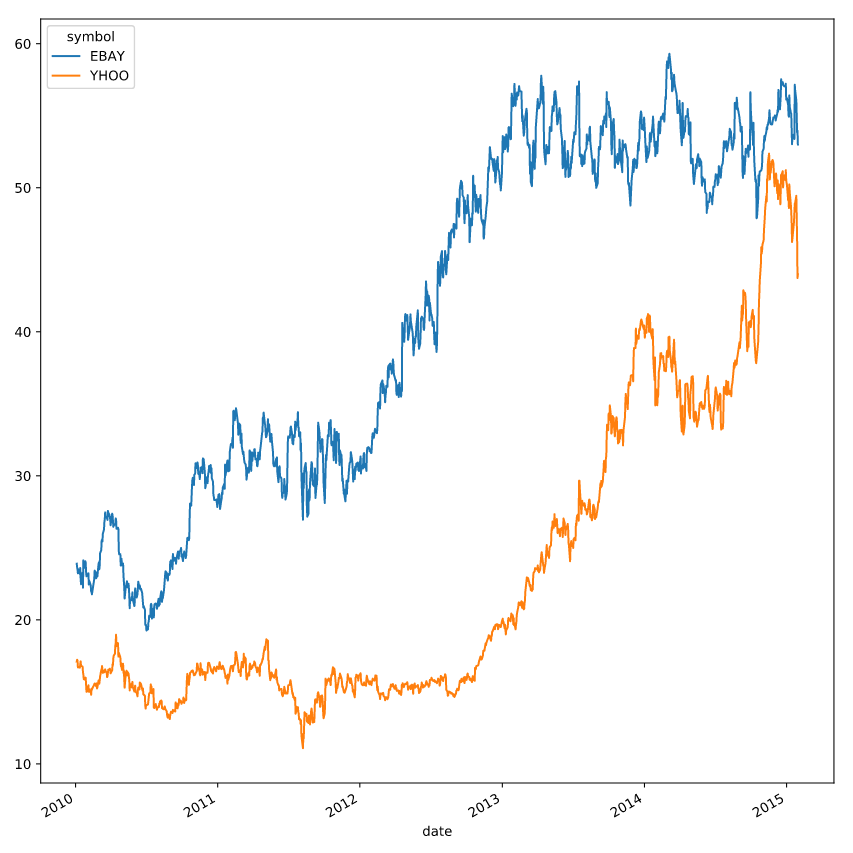

 2. Generate a scatter plot with the values of Ebay on the x-axis, and Yahoo on the y-axis. Look up the symbols for both companies from the column names of the DataFrame.

In [ ]:
# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO')
plt.show()

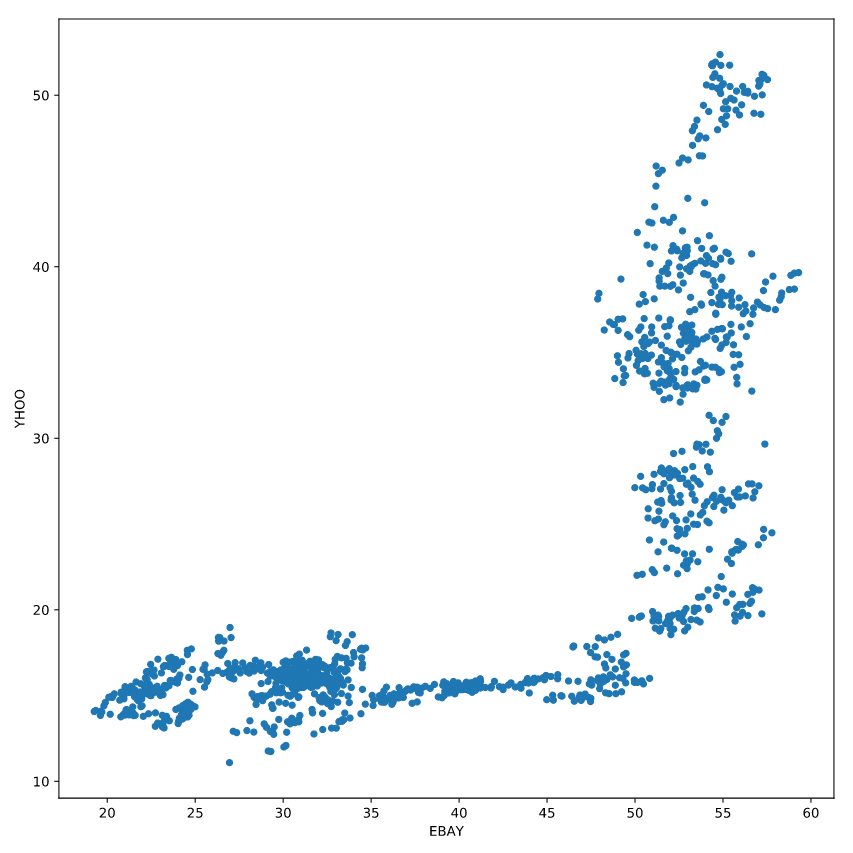

 3. Finally, encode time as the color of each datapoint in order to visualize how the relationship between these two variables changes.

In [ ]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, 
                    cmap=plt.cm.viridis, colorbar=False)
plt.show()

Conclusion

Correct! As you can see, these two time series seem somewhat related to each other, though its a complex relationship that changes over time.

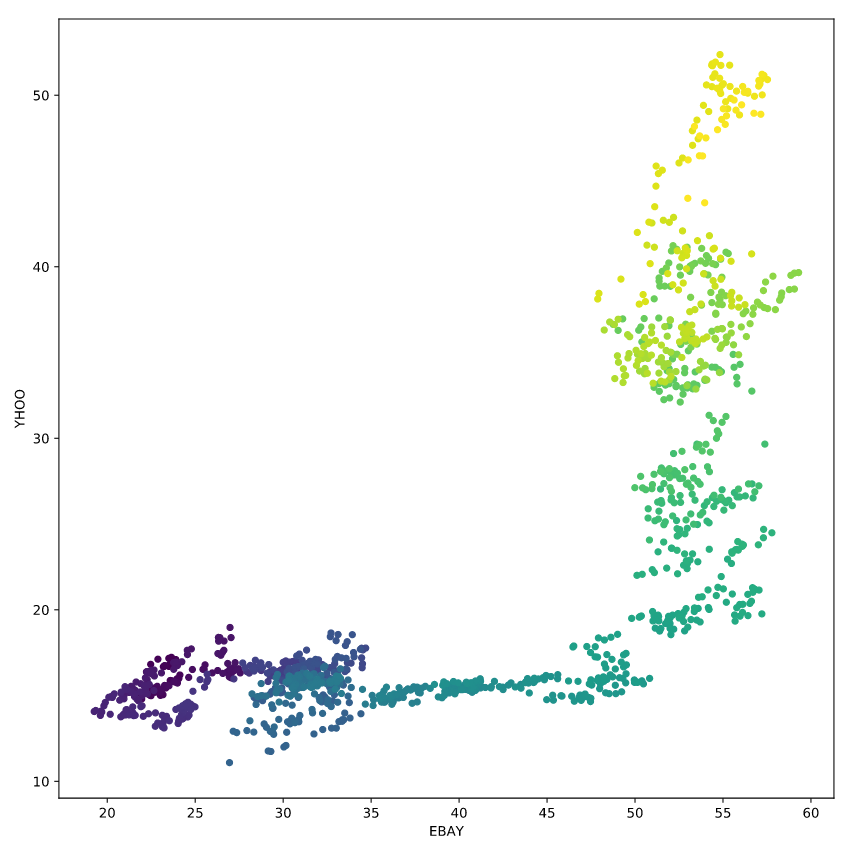

# Fitting a simple regression model

Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:

>ebay: "EBAY"
>
>nvidia: "NVDA"
>
>yahoo: "YHOO"
>
>apple: "AAPL"

We'll use these columns to define the input/output arrays in our model.

Instructions

1. Create the X and y arrays by using the column names provided.

2. The input values should be from the companies "ebay", "nvidia", and "yahoo"

3. The output values should be from the company "apple"

4. Use the data to train and score the model with cross-validation.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

'''
<script.py> output:
    [-6.09050633 -0.3179172  -3.72957284]
'''

Conclusion

Yes! As you can see, fitting a model with raw data doesn't give great results.

# Visualizing predicted values

When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

Instructions

1. Split the data (X and y) into training and test sets.

2. Use the training data to train the regression model.

3. Then use the testing data to generate predictions for the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

'''
<script.py> output:
    -5.70939901949
'''

 2. Plot a time series of the predicted and "actual" values of the testing data.

In [ ]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

Conclusion

Correct! Now you have an explanation for your poor score. The predictions clearly deviate from the true time series values.

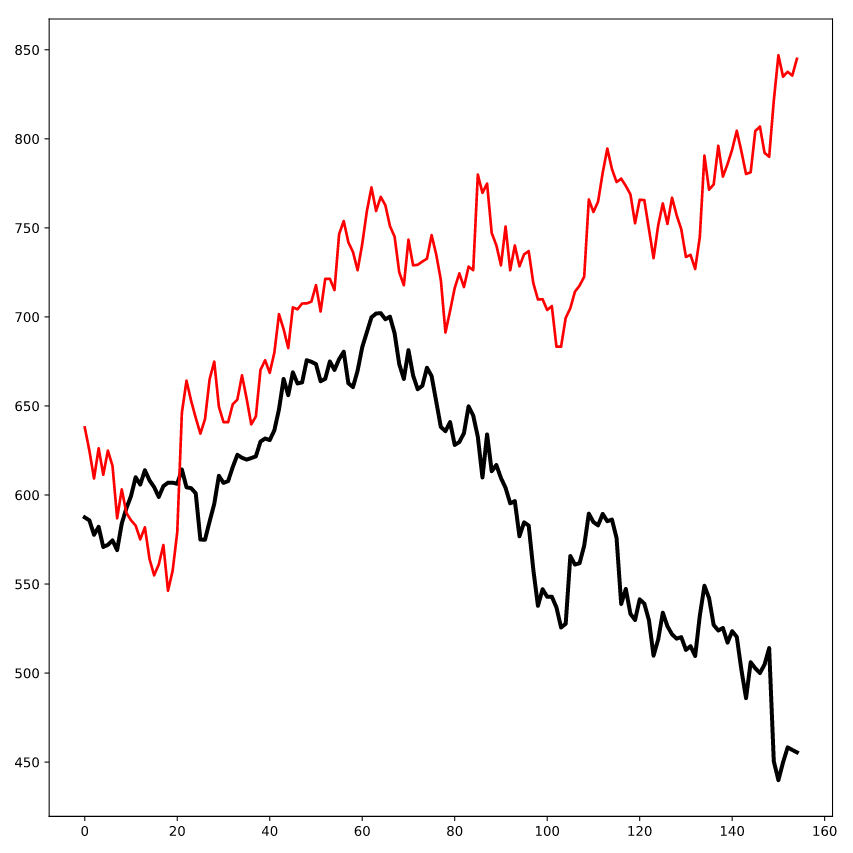

# Advanced time series prediction

1. Cleaning and improving your data
Now that we've covered some simple visualizations and model fitting with continuous timeseries, let's see what happens when we look at more real-world data.

2. Data is messy
Real-world data is always messy, and requires preparing and cleaning the data before fitting models. In timeseries, messy data often happens due to failing sensors or human error in logging the data. Let's cover some specific ways to spot and fix messy data with timeseries.

3. What messy data looks like
First, let's look at some messy-looking data. Here, we're showing the value of the company AIG over the last several years. There seem to be two periods of time where no data was produced, as well as some periods of time where the data doesn't fluctuate at all. Both look like they're aberrations, so let's see how we can correct for them. Before moving forward, note that it is not always clear whether patterns in the data are "aberrations" or not. You should always investigate to understand the source of strange patterns in the data.

4. Interpolation: using time to fill in missing data
First, let's fill in the missing data using other datapoints we do have. We'll use a technique called interpolation, which uses the values on either end of a missing window of time to infer what's in-between.

5. Interpolation in Pandas
In this example, we'll first create a boolean mask that we'll use to mark where the missing values are. Next, we call the dot-interpolate method to fill in the missing values. We'll use the first argument to signal we want linear interpolation. Finally, we'll plot the interpolated values.

6. Visualizing the interpolated data
You can see the results of interpolation in red. In this case, we used the "linear" argument so the interpolated values are a line between the start and stop point of the missing window. Other arguments to the dot-interpolate method will result in different behavior.

7. Using a rolling window to transform data
Another common technique to clean data is transforming it so that it is more well-behaved. To do this, we'll use the same rolling window technique covered in Chapter 2.

8. Transforming data to standardize variance
Using a rolling window, we'll calculate each timepoint's percent change over the mean of a window of previous timepoints. This standardizes the variance of our data and reduces long-term drift.

9. Transforming to percent change with Pandas
In this function, we first separate out the final value of the input array. Then, we calculate the mean of all but the last datapoint. Finally, we subtract the mean from the final datapoint, and divide by the mean. The result is the percent change for the final value.

10. Applying this to our data
We can apply this to our data using the dot-aggregate method, passing our function as an input. On the right, the data is now roughly centered at zero, and periods of high and low changes are easier to spot.

11. Finding outliers in your data
We'll use this transformation to detect outliers. Outliers are datapoints that are statistically different from the dataset as a whole. A common definition is any datapoint that is more than three standard deviations away from the mean of the dataset.

12. Plotting a threshold on our data
Here we'll visualize our definition of an outlier. We calculate the mean and standard deviation of each dataset, then plot outlier "thresholds" (three times the standard deviation from the mean) on the raw and transformed data.

13. Visualizing outlier thresholds
Here is the result. Any datapoint outside these bounds could be an outlier. Note that the datapoints deemed an outlier depend on the transformation of the data. On the right, we see a few outlier datapoints that were *not* outliers in the raw data.

14. Replacing outliers using the threshold
Next, we replace outliers with the median of the remaining values. We first center the data by subtracting its mean, and calculate the standard deviation. Finally, we calculate the absolute value of each datapoint, and mark any that lie outside of three standard deviations from the mean. We then replace these using the nanmedian function, which calculates the median without being hindered by missing values.

15. Visualize the results
As you can see, once we've replaced the outliers, there don't seem to be as many extreme datapoints. This should help our model find the patterns we want.

16. Let's practice!
Now we'll practice some basics in cleaning up the data and identifying outliers.

# Visualizing messy data

Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

The data has been loaded into a DataFrame called prices.

Instructions

1. Visualize the time series data using Pandas.

2. Calculate the number of missing values in each time series. Note any irregularities that you can see. What do you think they are?

In [ ]:
# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

'''
<script.py> output:
    symbol
    EBAY    273
    NVDA    502
    YHOO    232
    dtype: int64
'''

Conclusion

Nice job. In the plot, you can see there are clearly missing chunks of time in your data. There also seem to be a few 'jumps' in the data. How can you deal with this?

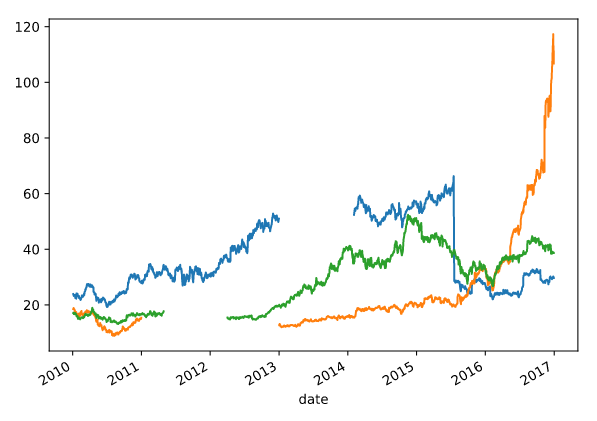

# Imputing missing values

When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (interpolate_and_plot()) you'll use to interpolate missing data points and plot them.

A single time series has been loaded into a DataFrame called prices.

Instructions

1. Create a boolean mask for missing values and interpolate the missing values using the interpolation argument of the function.

In [ ]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

 2. Interpolate using the latest non-missing value and plot the results. Recall that interpolate_and_plot's second input is a string specifying the kind of interpolation to use.

  - Hint: Interpolation using the latest non-missing value is labelled 'zero' in Pandas.

In [ ]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

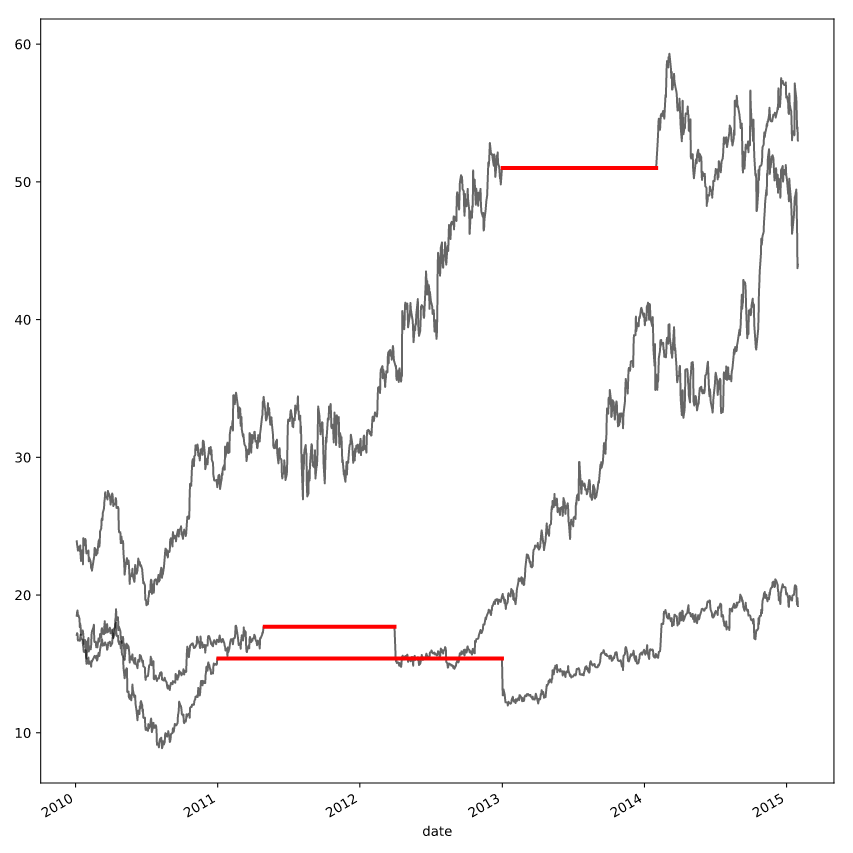

 3. Interpolate linearly and plot the results.

In [ ]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

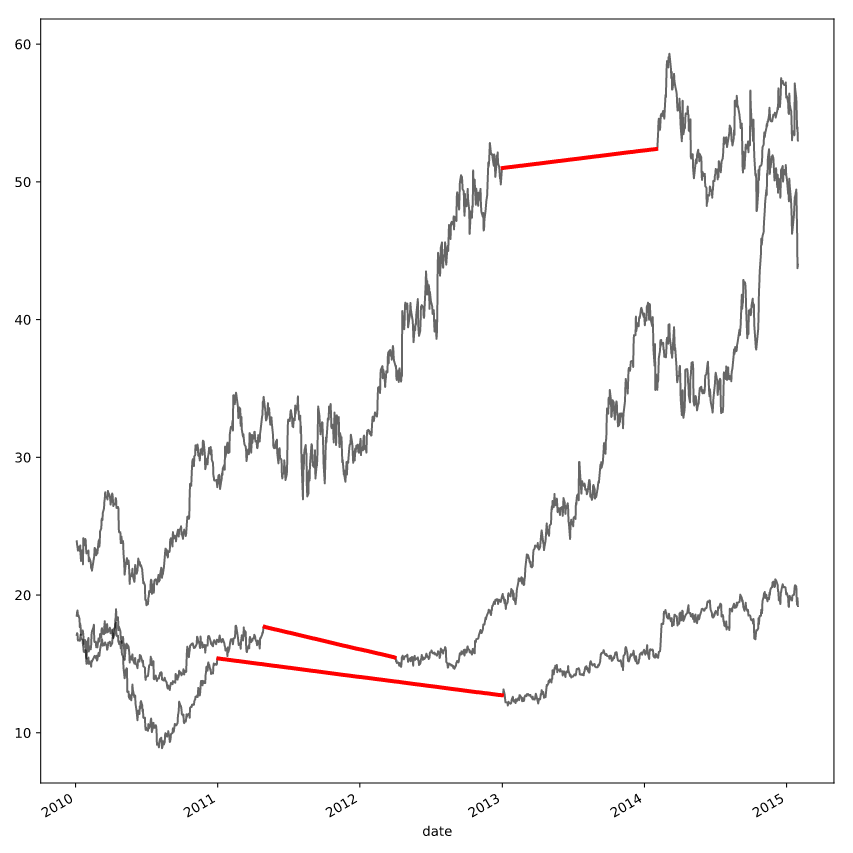

 4. Interpolate with a quadratic function and plot the results.

In [ ]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

Conclusion

Correct! When you interpolate, the pre-existing data is used to infer the values of missing data. As you can see, the method you use for this has a big effect on the outcome.

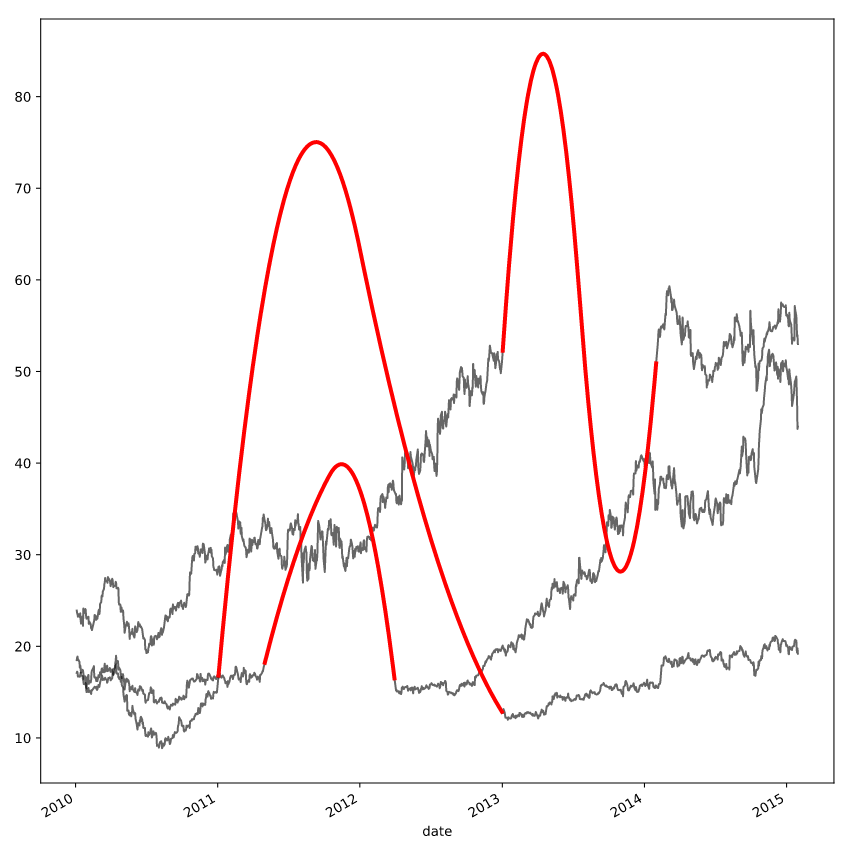

# Transforming raw data

In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

Instructions

1. Define a percent_change function that takes an input time series and does the following:

 - Extract all but the last value of the input series (assigned to previous_values) and the only the last value of the timeseries ( assigned to last_value)

 - Calculate the percentage difference between the last value and the mean of earlier values.

2. Using a rolling window of 20, apply this function to prices, and visualize it using the given code.

In [ ]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

Conclusion

Correct! You've converted the data so it's easier to compare one time point to another. This is a cleaner representation of the data.

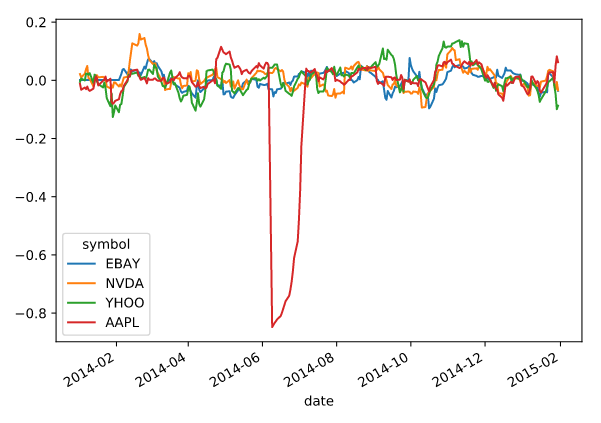

# Handling outliers

In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

Instructions

1. Define a function that takes an input series and does the following:

 - Calculates the absolute value of each datapoint's distance from the series mean, then creates a boolean mask for datapoints that are three times the standard deviation from the mean.

 - Use this boolean mask to replace the outliers with the median of the entire series.

2. Apply this function to your data and visualize the results using the given code.

In [ ]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

Conclusion

Great job! Since you've converted the data to % change over time, it was easier to spot and correct the outliers.

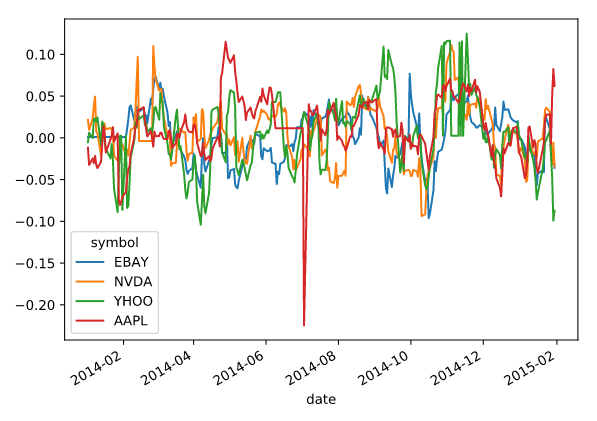

# Creating features over time

1. Creating features over time
In the final lesson of this chapter, we'll cover some specific features that are useful in timeseries analysis.

2. Extracting features with windows
Remember the rolling window used earlier to smooth our data? We can use the same technique to extract features as they change over time. In this image, we can define multiple functions of each window to extract many features at once.

3. Using .aggregate for feature extraction
In pandas, the dot-aggregate method can be used to calculate many features of a window at once. By passing a list of functions to the method, each function will be called on the window, and collected in the output. Here's an example - we first use the dot-rolling method to define a rolling window, then pass a list of two functions (for the standard deviation, and maximum value). This extracts two features for each column over time.

4. Check the properties of your features!
You can extract many different kinds of features this way. Always plot the features you've extracted over time, as this can give you a clue for how they behave and help you spot noisy data and outliers. Here we can see that the maximum value is much jumpier than the mean.

5. Using partial() in Python
A useful tool when using the dot-aggregate method is the partial function. This is built-in to Python, and lets you create a *new* function from an old one, with some of the parameters pre-configured. Let's see how this works. In this example, we first import partial from functools, then use it to create a mean function that always operates on the first axis. The first argument is the function we want to modify, and subsequent key-value pairs will be pre-set in the output function. After this, we no longer need to configure those values when we call the new function.

6. Percentiles summarize your data
Now, back to feature extraction. A particularly useful tool for feature extraction is the percentile function. This is similar to calculating the mean or median of your data, but it gives you more fine-grained control over what is extracted. The percentile function takes an array as the first input, and an integer between 0 and 100 as the second input. It will return the value in the input array that matches the percentile you've chosen. Here it returns 40, which means that the value "40" is larger than 20% of the input array.

7. Combining np.percentile() with partial functions to calculate a range of percentiles
Here we'll combine the percentile function with partial functions in order to extract several percentiles with the dot-aggregate method. We use a list comprehension to create a list of functions (called percentile_funcs). Then, we loop through the list, calling each function on our data, to return a different percentile of the data. We could pass this list of partial functions to our dot-aggregate method to extract several percentiles for each column.

8. Calculating "date-based" features
Another common feature to consider are "date-based" features. That is, features that take into consideration information like "what time of the year is it?" or "is it a holiday?". Since many datasets involve humans, these pieces of information are often important. For example, if you're trying to predict the number of customers that will visit your store each day, it's important to know if it's the weekend or not! Working with dates and times is straightforward in Pandas, which we'll cover next.

9. datetime features using Pandas
Datetime functionality is most commonly accessed with a DataFrame's index. As you saw in the first chapter, you can use the to_datetime function to ensure dates are treated as datetime objects. You can also extract many date-specific pieces of information, such as the day of the week, or weekday name as shown here. These could then be treated as features in your model.

10. Let's practice!
Now that we've got a few more features to consider, let's practice extracting them and visualizing how they look on our data.

# Engineering multiple rolling features at once

Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

Instructions

1. Define a list consisting of four features you will calculate: the minimum, maximum, mean, and standard deviation (in that order).

2. Using the rolling window (prices_perc_rolling) we defined for you, calculate the features from features_to_calculate.

3. Plot the results over time, along with the original time series using the given code.

In [ ]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

Conclusion

Well done! In the next exercise, you will calculate the percentiles.

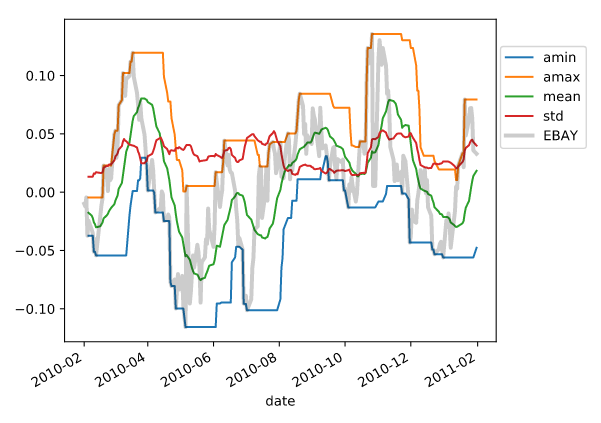

# Percentiles and partial functions

In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same percentile() function in numpy.

Instructions

1. Import partial from functools.

2. Use the partial() function to create several feature generators that calculate percentiles of your data using a list comprehension.

3. Using the rolling window (prices_perc_rolling) we defined for you, calculate the quantiles using percentile_functions.

4. Visualize the results using the code given to you.

In [ ]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

Conclusion

Nice rolling! In the next exercise, you will extract the date components of the timestamps.

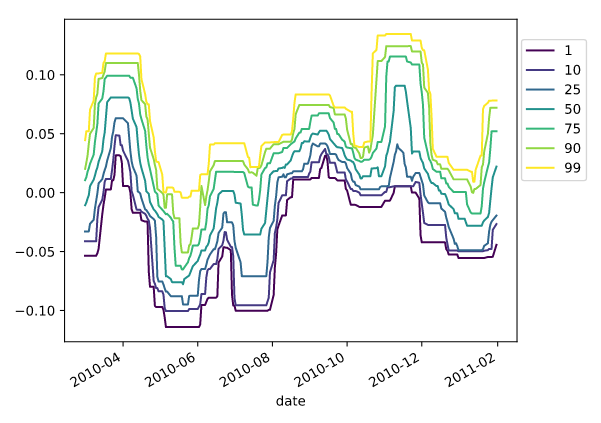

# Using "date" information

It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In this exercise, you'll extract these date/time based features. A single time series has been loaded in a variable called prices.

Instructions

1. Calculate the day of the week, week number in a year, and month number in a year.

2. Add each one as a column to the prices_perc DataFrame, under the names day_of_week, week_of_year and month_of_year, respectively.

In [ ]:
'''
In [4]:
prices.info()
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
EBAY    1762 non-null float64
NVDA    1762 non-null float64
YHOO    1762 non-null float64
AAPL    1762 non-null float64
dtypes: float64(4)
memory usage: 148.8 KB
'''

# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.weekday
prices_perc['week_of_year'] = prices_perc.index.week
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

'''
<script.py> output:
                    EBAY  day_of_week  week_of_year  month_of_year
    date                                                          
    2014-01-02  0.017938            3             1              1
    2014-01-03  0.002268            4             1              1
    2014-01-06 -0.027365            0             2              1
    2014-01-07 -0.006665            1             2              1
    2014-01-08 -0.017206            2             2              1
    2014-01-09 -0.023270            3             2              1
    2014-01-10 -0.022257            4             2              1
    2014-01-13 -0.015901            0             3              1
    2014-01-14 -0.009002            1             3              1
    2014-01-15  0.006678            2             3              1
    2014-01-16  0.004545            3             3              1
    2014-01-17 -0.006145            4             3              1
    2014-01-21  0.011801            1             4              1
    2014-01-22  0.017089            2             4              1
    2014-01-23  0.027897            3             4              1
    2014-01-24  0.017463            4             4              1
    2014-01-27 -0.010723            0             5              1
    2014-01-28 -0.004210            1             5              1
    2014-01-29 -0.021560            2             5              1
    2014-01-30 -0.000356            3             5              1
    2014-01-31  0.000772            4             5              1
    2014-02-03 -0.014406            0             6              2
    2014-02-04 -0.005225            1             6              2
    2014-02-05  0.006204            2             6              2
    2014-02-06  0.021023            3             6              2
    2014-02-07  0.022829            4             6              2
    2014-02-10  0.005244            0             7              2
    2014-02-11  0.013913            1             7              2
    2014-02-12  0.022265            2             7              2
    2014-02-13  0.022899            3             7              2
    ...              ...          ...           ...            ...
    2015-11-18  0.006059            2            47             11
    2015-11-19  0.004594            3            47             11
    2015-11-20  0.013584            4            47             11
    2015-11-23  0.004270            0            48             11
    2015-11-24  0.008973            1            48             11
    2015-11-25  0.007589            2            48             11
    2015-11-27  0.009550            4            48             11
    2015-11-30  0.024304            0            49             11
    2015-12-01  0.003618            1            49             12
    2015-12-02  0.000582            2            49             12
    2015-12-03 -0.011950            3            49             12
    2015-12-04  0.015626            4            49             12
    2015-12-07  0.005337            0            50             12
    2015-12-08 -0.003425            1            50             12
    2015-12-09 -0.018376            2            50             12
    2015-12-10 -0.009308            3            50             12
    2015-12-11 -0.030131            4            50             12
    2015-12-14 -0.027313            0            51             12
    2015-12-15 -0.017158            1            51             12
    2015-12-16 -0.007877            2            51             12
    2015-12-17 -0.025614            3            51             12
    2015-12-18 -0.044852            4            51             12
    2015-12-21 -0.037511            0            52             12
    2015-12-22 -0.024807            1            52             12
    2015-12-23 -0.026665            2            52             12
    2015-12-24 -0.028684            3            52             12
    2015-12-28 -0.026797            0            53             12
    2015-12-29 -0.013726            1            53             12
    2015-12-30 -0.017296            2            53             12
    2015-12-31 -0.024640            3            53             12
    
    [504 rows x 4 columns]
'''

Conclusion

Good job! This concludes the third chapter. In the next chapter, you will learn advanced techniques to validate and inspect your time series models.